In [8]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from datetime import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 280)


In [5]:
X_train = pd.read_csv('/Users/dnn/M2DS 24-25/Courses/H!ckathon/data/X_test_Hi5.csv')

/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_64311/198306794.py:1: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train = pd.read_csv('/Users/dnn/M2DS 24-25/Courses/H!ckathon/data/X_test_Hi5.csv')


In [6]:
X_train['hydro_method_label'].nunique()

1

In [7]:
print(X_train.columns)

Index(['row_index', 'piezo_station_department_code',
       'piezo_station_update_date', 'piezo_station_investigation_depth',
       'piezo_station_department_name', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_altitude', 'piezo_station_bss_code',
       ...
       'prelev_volume_obtention_mode_label_2', 'prelev_longitude_2',
       'prelev_latitude_2', 'prelev_commune_code_insee_2',
       'prelev_other_volume_sum', 'insee_%_agri', 'insee_pop_commune',
       'insee_med_living_level', 'insee_%_ind', 'insee_%_const'],
      dtype='object', length=135)


## Piezo

In [8]:
piezo_columns = []
for col in X_train.columns:
    if col.startswith('piezo'):
        piezo_columns.append(col)

df_piezo = X_train[piezo_columns]


In [9]:
df_piezo

,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_commune_name,piezo_station_longitude,piezo_station_latitude,piezo_station_bss_id,piezo_bss_code,piezo_measurement_date,piezo_obtention_mode,piezo_status,piezo_qualification,piezo_continuity_code,piezo_continuity_name,piezo_producer_code,piezo_producer_name,piezo_measure_nature_code,piezo_measure_nature_name
0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,Ceyzérieu,5.748241,45.828148,BSS001TTQQ,07004X0046/D6-20,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,Saint-Jean-le-Vieux,5.356637,46.028102,BSS001SCTM,06754X0077/F1,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,Meximieux,5.220795,45.895734,BSS001TRPH,06993X0226/MEXI_2,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,Péron,5.948977,46.201180,BSS001RGXM,06533X0070/F2,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,Tossiat,5.313353,46.136402,BSS001RFRV,06518X0026/P2,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611203,95,Thu Sep 19 11:45:47 CEST 2024,24.00,Val-d'Oise,95119,Puits du hameau de Buchet (Buhy - 95),['121AZ01'],63.00,01258X0020/S1,Buhy,1.711584,49.197517,BSS000JRAR,01258X0020/S1,2023-09-30,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,238.0,Service Géologique Régional Ile-de-France (238),N,Naturel
611204,95,Thu Sep 19 14:41:55 CEST 2024,25.50,Val-d'Oise,95142,PIÉZOMÈTRE DU HAMEAU DE BERCAGNY (CHARS -95),['113AQ27'],103.00,01266X1013/S1,Chars,1.901276,49.145695,BSS000JSGS,01266X1013/S1,2023-09-30,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,291.0,Service Géologique Régional Haute-Normandie (291),N,Naturel
611205,95,Thu Sep 19 14:29:16 CEST 2024,30.00,Val-d'Oise,95610,Piézomètre de la place Roland Vasseur (Théméri...,['121AP01'],83.00,01522X0069/PZ2008,Théméricourt,1.897576,49.083846,BSS000LGAW,01522X0069/PZ2008,2023-09-30,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,291.0,Service Géologique Régional Haute-Normandie (291),N,Naturel
611206,95,Thu Dec 14 19:02:16 CET 2023,630.00,Val-d'Oise,95313,PIÉZOMÈTRE DE L'ISLE-ADAM (ISLE-ADAM - 95),['127AA99'],24.00,01531X0047/F,L'Isle-Adam,2.209806,49.105985,BSS000LHVY,01531X0047/F,2023-09-30,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,238.0,Service Géologique Régional Ile-de-France (238),N,Naturel


## Datetime

In [10]:
df_piezo['piezo_measurement_date'] = pd.to_datetime(df_piezo['piezo_measurement_date'], format='%Y-%m-%d')
#df_piezo.sort_values(by='piezo_measurement_date', inplace=True)
#df_piezo.set_index('piezo_measurement_date', inplace=True)

/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_64311/2078174198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_piezo['piezo_measurement_date'] = pd.to_datetime(df_piezo['piezo_measurement_date'], format='%Y-%m-%d')


In [11]:
df_piezo

,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,piezo_station_commune_name,piezo_station_longitude,piezo_station_latitude,piezo_station_bss_id,piezo_bss_code,piezo_measurement_date,piezo_obtention_mode,piezo_status,piezo_qualification,piezo_continuity_code,piezo_continuity_name,piezo_producer_code,piezo_producer_name,piezo_measure_nature_code,piezo_measure_nature_name
0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,Ceyzérieu,5.748241,45.828148,BSS001TTQQ,07004X0046/D6-20,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,Saint-Jean-le-Vieux,5.356637,46.028102,BSS001SCTM,06754X0077/F1,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,Meximieux,5.220795,45.895734,BSS001TRPH,06993X0226/MEXI_2,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,Péron,5.948977,46.201180,BSS001RGXM,06533X0070/F2,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,Tossiat,5.313353,46.136402,BSS001RFRV,06518X0026/P2,2022-06-01,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,196.0,Service Géologique Régional Rhône-Alpes (196),N,Naturel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611203,95,Thu Sep 19 11:45:47 CEST 2024,24.00,Val-d'Oise,95119,Puits du hameau de Buchet (Buhy - 95),['121AZ01'],63.00,01258X0020/S1,Buhy,1.711584,49.197517,BSS000JRAR,01258X0020/S1,2023-09-30,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,238.0,Service Géologique Régional Ile-de-France (238),N,Naturel
611204,95,Thu Sep 19 14:41:55 CEST 2024,25.50,Val-d'Oise,95142,PIÉZOMÈTRE DU HAMEAU DE BERCAGNY (CHARS -95),['113AQ27'],103.00,01266X1013/S1,Chars,1.901276,49.145695,BSS000JSGS,01266X1013/S1,2023-09-30,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,291.0,Service Géologique Régional Haute-Normandie (291),N,Naturel
611205,95,Thu Sep 19 14:29:16 CEST 2024,30.00,Val-d'Oise,95610,Piézomètre de la place Roland Vasseur (Théméri...,['121AP01'],83.00,01522X0069/PZ2008,Théméricourt,1.897576,49.083846,BSS000LGAW,01522X0069/PZ2008,2023-09-30,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,291.0,Service Géologique Régional Haute-Normandie (291),N,Naturel
611206,95,Thu Dec 14 19:02:16 CET 2023,630.00,Val-d'Oise,95313,PIÉZOMÈTRE DE L'ISLE-ADAM (ISLE-ADAM - 95),['127AA99'],24.00,01531X0047/F,L'Isle-Adam,2.209806,49.105985,BSS000LHVY,01531X0047/F,2023-09-30,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,238.0,Service Géologique Régional Ile-de-France (238),N,Naturel


In [12]:
df_piezo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611208 entries, 0 to 611207
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   piezo_station_department_code      611208 non-null  object        
 1   piezo_station_update_date          611208 non-null  object        
 2   piezo_station_investigation_depth  572355 non-null  float64       
 3   piezo_station_department_name      611208 non-null  object        
 4   piezo_station_commune_code_insee   611208 non-null  object        
 5   piezo_station_pe_label             562751 non-null  object        
 6   piezo_station_bdlisa_codes         581508 non-null  object        
 7   piezo_station_altitude             611208 non-null  float64       
 8   piezo_station_bss_code             611208 non-null  object        
 9   piezo_station_commune_name         611208 non-null  object        
 10  piezo_station_longit

In [13]:
df_piezo.describe()

,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,piezo_measurement_date,piezo_continuity_code,piezo_producer_code
count,572355.000000,611208.000000,611208.000000,611208.000000,611208,611208.000000,5.912910e+05
mean,85.769989,146.468334,2.191367,46.382918,2023-01-28 04:14:53.532806656,1.999084,4.994526e+12
min,0.000000,-999.000000,-4.657129,41.399732,2022-06-01 00:00:00,1.000000,5.300000e+01
25%,16.470000,40.000000,-0.112823,44.472234,2022-07-31 00:00:00,2.000000,2.650000e+02
50%,38.350000,107.000000,1.901276,46.305138,2022-09-29 00:00:00,2.000000,3.000000e+02
75%,80.000000,185.000000,4.123897,48.186733,2023-07-31 00:00:00,2.000000,1.219000e+03
max,5233.400000,2150.000000,9.519890,50.971087,2023-09-30 00:00:00,2.000000,4.930211e+13
std,241.824056,190.889950,2.698975,2.173051,NaN,0.030255,1.080798e+13


## MIssing Value

In [14]:
df_piezo.isna().sum()

piezo_station_department_code            0
piezo_station_update_date                0
piezo_station_investigation_depth    38853
piezo_station_department_name            0
piezo_station_commune_code_insee         0
piezo_station_pe_label               48457
piezo_station_bdlisa_codes           29700
piezo_station_altitude                   0
piezo_station_bss_code                   0
piezo_station_commune_name               0
piezo_station_longitude                  0
piezo_station_latitude                   0
piezo_station_bss_id                     0
piezo_bss_code                           0
piezo_measurement_date                   0
piezo_obtention_mode                     0
piezo_status                             0
piezo_qualification                      0
piezo_continuity_code                    0
piezo_continuity_name                    0
piezo_producer_code                  19917
piezo_producer_name                  19917
piezo_measure_nature_code            20168
piezo_measu

Available coordinates: 2683
Selected coordinate for plotting: [(46.4015565952228, 4.40121638913486)]


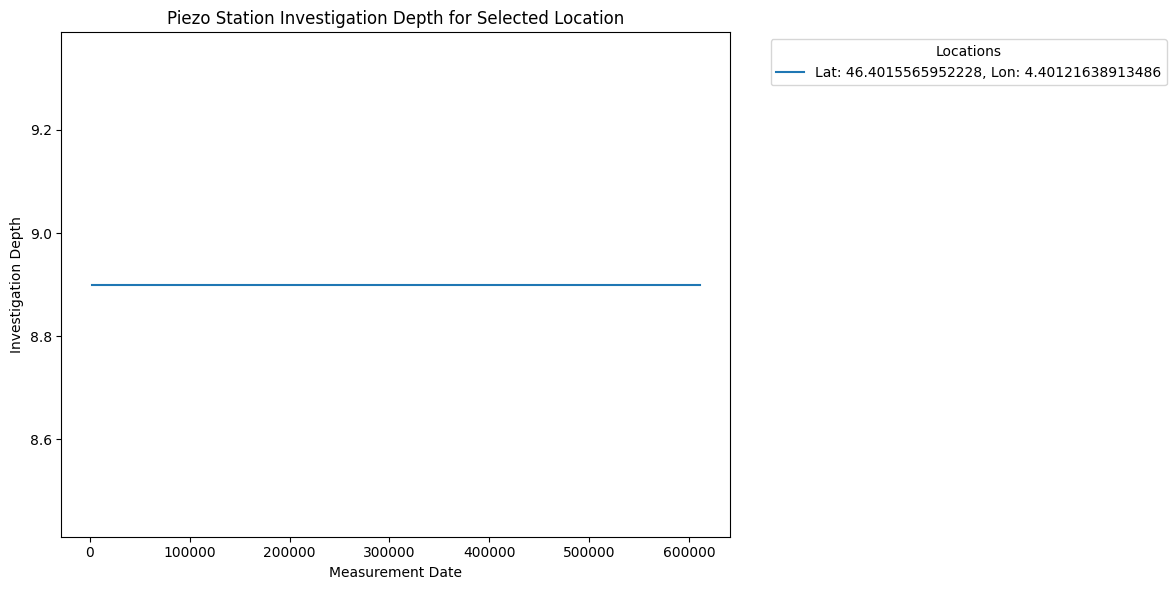

In [15]:
# Get all unique (latitude, longitude) pairs in the dataset
available_coords = df_piezo[['piezo_station_latitude', 'piezo_station_longitude']].drop_duplicates()

# Convert to a list of tuples
available_coords_list = list(available_coords.itertuples(index=False, name=None))

# Print the list of available coordinates
print("Available coordinates:", len(available_coords_list))

# Select the first coordinate pair for analysis
selected_coords = [available_coords_list[2000]]

# Print the selected pair
print(f"Selected coordinate for plotting: {selected_coords}")

# Proceed with plotting (reusing the earlier plotting code)
import matplotlib.pyplot as plt

# Group the data by latitude and longitude
groups = df_piezo.groupby(['piezo_station_latitude', 'piezo_station_longitude'])

# Create the plot for the first available coordinate
fig, ax = plt.subplots(figsize=(12, 6))

for lat, lon in selected_coords:
    if (lat, lon) in groups.groups:  # Check if the pair exists in the dataset
        group = groups.get_group((lat, lon)).sort_index()  # Retrieve the group
        ax.plot(group.index, group['piezo_station_investigation_depth'], label=f"Lat: {lat}, Lon: {lon}")

# Add labels, title, and legend
ax.set_title('Piezo Station Investigation Depth for Selected Location')
ax.set_xlabel('Measurement Date')
ax.set_ylabel('Investigation Depth')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Locations")
plt.tight_layout()
plt.show()


## Soit si au cour de la time series on a une valeur et on la met partout, si on pas de valeur pour tout la time series alors on remplace par la median de toute sles station le meme jour 

In [16]:
import numpy as np
import pandas as pd

def preprocess_piezo_data(df):
    """
    Preprocess the piezo data:
    1. Impute missing values in 'piezo_station_investigation_depth':
        - Propagate existing values for a station across its time series (ffill/bfill).
        - If no values exist for a station, replace with the median of all stations on the same day.
    2. Impute missing values in 'piezo_measure_nature_code':
        - Replace NaN with the mode of the variable within the same (latitude, longitude) group.
        - For remaining NaN, impute using random sampling based on the global probability distribution of categories.
    3. Remove specified unnecessary columns.

    :param df: DataFrame containing piezo data.
    :return: Preprocessed DataFrame with missing values imputed and unnecessary columns removed.
    """
    # Step 1: Remove unnecessary columns
    columns_to_remove = [
        'piezo_producer_name', 'piezo_producer_code',
        'piezo_measure_nature_name', 'piezo_station_bdlisa_codes',
        'piezo_station_pe_label', 'row_index', 'piezo_station_update_date'
    ]
    df.drop(columns=columns_to_remove, errors='ignore', inplace=True)

    # Step 2: Reset index to ensure unique indexing
    df.reset_index(inplace=True)

    # Step 3: Impute 'piezo_station_investigation_depth'
    # Group by station and propagate values
    stations = df.groupby(['piezo_station_latitude', 'piezo_station_longitude'])
    df['piezo_station_investigation_depth'] = stations['piezo_station_investigation_depth'].transform(
        lambda group: group.ffill().bfill()
    )

    # Handle remaining missing values using the median for each date
    if 'piezo_measurement_date' in df.columns:
        daily_medians = df.groupby('piezo_measurement_date')['piezo_station_investigation_depth'].median()
        missing_idx = df['piezo_station_investigation_depth'].isnull()
        df.loc[missing_idx, 'piezo_station_investigation_depth'] = df.loc[missing_idx, 'piezo_measurement_date'].map(daily_medians)

    # Step 4: Impute 'piezo_measure_nature_code'
    # Fill missing values with the mode for the same station group
    df['piezo_measure_nature_code'] = stations['piezo_measure_nature_code'].transform(
        lambda group: group.fillna(group.mode().iloc[0]) if not group.mode().empty else group
    )

    # For remaining NaN, replace with random sampling based on global probability distribution
    missing_idx = df['piezo_measure_nature_code'].isnull()
    if missing_idx.any():
        value_counts = df['piezo_measure_nature_code'].value_counts(normalize=True)
        categories = value_counts.index
        probabilities = value_counts.values
        df.loc[missing_idx, 'piezo_measure_nature_code'] = np.random.choice(
            categories, size=missing_idx.sum(), p=probabilities
        )

    # Restore the original index
    df.set_index('piezo_measurement_date', inplace=True)

    return df


In [17]:
df_piezo_cleaned = preprocess_piezo_data(df_piezo)


/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_64311/126226899.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_remove, errors='ignore', inplace=True)
/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_64311/126226899.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['piezo_station_investigation_depth'] = stations['piezo_station_investigation_depth'].transform(
/var/folders/cg/ltgc1bw91_q800mfcy5vfvkw0000gn/T/ipykernel_64311/126226899.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [18]:
df_piezo.isna().sum()

index                                0
piezo_station_department_code        0
piezo_station_investigation_depth    0
piezo_station_department_name        0
piezo_station_commune_code_insee     0
piezo_station_altitude               0
piezo_station_bss_code               0
piezo_station_commune_name           0
piezo_station_longitude              0
piezo_station_latitude               0
piezo_station_bss_id                 0
piezo_bss_code                       0
piezo_obtention_mode                 0
piezo_status                         0
piezo_qualification                  0
piezo_continuity_code                0
piezo_continuity_name                0
piezo_measure_nature_code            0
dtype: int64

<Axes: >

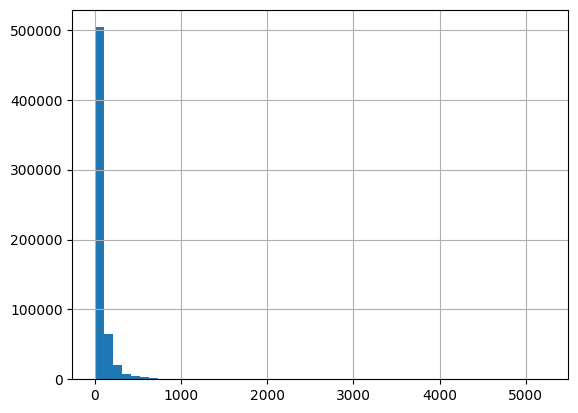

In [19]:
df_piezo['piezo_station_investigation_depth'].hist(bins=50)

In [20]:
df_piezo

,index,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_altitude,piezo_station_bss_code,piezo_station_commune_name,piezo_station_longitude,piezo_station_latitude,piezo_station_bss_id,piezo_bss_code,piezo_obtention_mode,piezo_status,piezo_qualification,piezo_continuity_code,piezo_continuity_name,piezo_measure_nature_code
piezo_measurement_date,,,,,,,,,,,,,,,,,,
2022-06-01,0,01,20.00,Ain,01073,232.00,07004X0046/D6-20,Ceyzérieu,5.748241,45.828148,BSS001TTQQ,07004X0046/D6-20,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
2022-06-01,1,01,35.60,Ain,01363,247.25,06754X0077/F1,Saint-Jean-le-Vieux,5.356637,46.028102,BSS001SCTM,06754X0077/F1,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
2022-06-01,2,01,35.22,Ain,01244,218.77,06993X0226/MEXI_2,Meximieux,5.220795,45.895734,BSS001TRPH,06993X0226/MEXI_2,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
2022-06-01,3,01,34.20,Ain,01288,499.85,06533X0070/F2,Péron,5.948977,46.201180,BSS001RGXM,06533X0070/F2,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
2022-06-01,4,01,37.30,Ain,01422,260.00,06518X0026/P2,Tossiat,5.313353,46.136402,BSS001RFRV,06518X0026/P2,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,611203,95,24.00,Val-d'Oise,95119,63.00,01258X0020/S1,Buhy,1.711584,49.197517,BSS000JRAR,01258X0020/S1,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
2023-09-30,611204,95,25.50,Val-d'Oise,95142,103.00,01266X1013/S1,Chars,1.901276,49.145695,BSS000JSGS,01266X1013/S1,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
2023-09-30,611205,95,30.00,Val-d'Oise,95610,83.00,01522X0069/PZ2008,Théméricourt,1.897576,49.083846,BSS000LGAW,01522X0069/PZ2008,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N


In [21]:
df_piezo.reset_index(inplace=True)

In [22]:
df_piezo

,piezo_measurement_date,index,piezo_station_department_code,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_altitude,piezo_station_bss_code,piezo_station_commune_name,piezo_station_longitude,piezo_station_latitude,piezo_station_bss_id,piezo_bss_code,piezo_obtention_mode,piezo_status,piezo_qualification,piezo_continuity_code,piezo_continuity_name,piezo_measure_nature_code
0,2022-06-01,0,01,20.00,Ain,01073,232.00,07004X0046/D6-20,Ceyzérieu,5.748241,45.828148,BSS001TTQQ,07004X0046/D6-20,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
1,2022-06-01,1,01,35.60,Ain,01363,247.25,06754X0077/F1,Saint-Jean-le-Vieux,5.356637,46.028102,BSS001SCTM,06754X0077/F1,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
2,2022-06-01,2,01,35.22,Ain,01244,218.77,06993X0226/MEXI_2,Meximieux,5.220795,45.895734,BSS001TRPH,06993X0226/MEXI_2,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
3,2022-06-01,3,01,34.20,Ain,01288,499.85,06533X0070/F2,Péron,5.948977,46.201180,BSS001RGXM,06533X0070/F2,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
4,2022-06-01,4,01,37.30,Ain,01422,260.00,06518X0026/P2,Tossiat,5.313353,46.136402,BSS001RFRV,06518X0026/P2,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611203,2023-09-30,611203,95,24.00,Val-d'Oise,95119,63.00,01258X0020/S1,Buhy,1.711584,49.197517,BSS000JRAR,01258X0020/S1,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
611204,2023-09-30,611204,95,25.50,Val-d'Oise,95142,103.00,01266X1013/S1,Chars,1.901276,49.145695,BSS000JSGS,01266X1013/S1,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
611205,2023-09-30,611205,95,30.00,Val-d'Oise,95610,83.00,01522X0069/PZ2008,Théméricourt,1.897576,49.083846,BSS000LGAW,01522X0069/PZ2008,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N
611206,2023-09-30,611206,95,630.00,Val-d'Oise,95313,24.00,01531X0047/F,L'Isle-Adam,2.209806,49.105985,BSS000LHVY,01531X0047/F,Valeur mesurée,Donnée contrôlée niveau 2,Correcte,2.0,Point lié au point précédent,N


In [23]:
# Exporter le DataFrame en CSV
df_piezo.to_csv('/Users/dnn/M2DS 24-25/Courses/H!ckathon/data/preprocessed_piezo_data_test.csv', index=False, sep=';', encoding='utf-8')
